In [316]:
%pip install -U imbalanced-learn

Could not fetch URL https://pypi.org/simple/imbalanced-learn/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/imbalanced-learn/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


In [317]:
# Basic functionalities
import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For clustering
from sklearn.cluster import KMeans

# For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Classifier
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import calinski_harabasz_score

# To pickle preparation models
from pickle import dump, load

In [318]:
# load in the data
df_customers = pd.read_csv('cluster_analysis/Udacity_CUSTOMERS_052018.csv', sep=';')
df_azdias = pd.read_csv('cluster_analysis/Udacity_AZDIAS_052018.csv', sep=';', nrows=len(df_customers))

/var/folders/d0/9fww0yld04lcs00vtk4y1lr80000gn/T/ipykernel_76937/1440226887.py:2: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_customers = pd.read_csv('cluster_analysis/Udacity_CUSTOMERS_052018.csv', sep=';')
/var/folders/d0/9fww0yld04lcs00vtk4y1lr80000gn/T/ipykernel_76937/1440226887.py:3: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_azdias = pd.read_csv('cluster_analysis/Udacity_AZDIAS_052018.csv', sep=';', nrows=len(df_customers))


In [319]:
df_test = pd.read_csv('cluster_analysis/Udacity_MAILOUT_052018_TEST.csv', sep=';')
df_train = pd.read_csv('cluster_analysis/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

/var/folders/d0/9fww0yld04lcs00vtk4y1lr80000gn/T/ipykernel_76937/3014725620.py:1: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('cluster_analysis/Udacity_MAILOUT_052018_TEST.csv', sep=';')
/var/folders/d0/9fww0yld04lcs00vtk4y1lr80000gn/T/ipykernel_76937/3014725620.py:2: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('cluster_analysis/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')


In [320]:
def description_dataframe():
    '''
    Create Dataframe with descriptive information.

    Output:
    - desc_df
    '''

    desc_df = pd.DataFrame(df_azdias.columns.to_list())
    desc_df = desc_df.rename(columns={0: 'column_name'})

    desc_df["na_percentage"] = desc_df["column_name"].apply(lambda x: round(df_azdias[x].isna().sum()/df_azdias.shape[0], 4))
    desc_df["dtypes"] =  desc_df["column_name"].apply(lambda x: set(df_azdias[x].map(type).tolist()))
    desc_df["n_dtypes"] = desc_df["column_name"].apply(lambda x: len(set(df_azdias[x].map(type).tolist())))
    desc_df["unique_values"] = desc_df["column_name"].apply(lambda x: len(df_azdias[x].value_counts()))

    return desc_df

In [321]:
desc_df = description_dataframe()

In [322]:
desc_df

,column_name,na_percentage,dtypes,n_dtypes,unique_values,action,reason
0,LNR,0.0000,{<class 'int'>},1,191652,Keep,None
1,AGER_TYP,0.0000,{<class 'int'>},1,5,Keep,None
2,AKT_DAT_KL,0.0835,{<class 'float'>},1,9,Keep,None
3,ALTER_HH,0.0835,{<class 'float'>},1,22,Keep,None
4,ALTER_KIND1,0.9085,{<class 'float'>},1,17,Keep,None
...,...,...,...,...,...,...,...
361,WOHNDAUER_2008,0.0835,{<class 'float'>},1,9,Keep,None
362,WOHNLAGE,0.1051,{<class 'float'>},1,8,Keep,None
363,ZABEOTYP,0.0000,{<class 'int'>},1,6,Keep,None
364,ANREDE_KZ,0.0000,{<class 'int'>},1,2,Keep,None


In [323]:
na_series = desc_df.na_percentage.round(2).value_counts().sort_values(ascending=False)
na_series

0.12    118
0.00     93
0.15     64
0.11     29
0.01     19
0.08     12
0.13     10
0.29      9
0.09      3
0.02      1
0.91      1
0.66      1
0.97      1
0.30      1
0.99      1
0.74      1
1.00      1
0.06      1
Name: na_percentage, dtype: int64

[Text(0, 0.5, 'Count of value')]

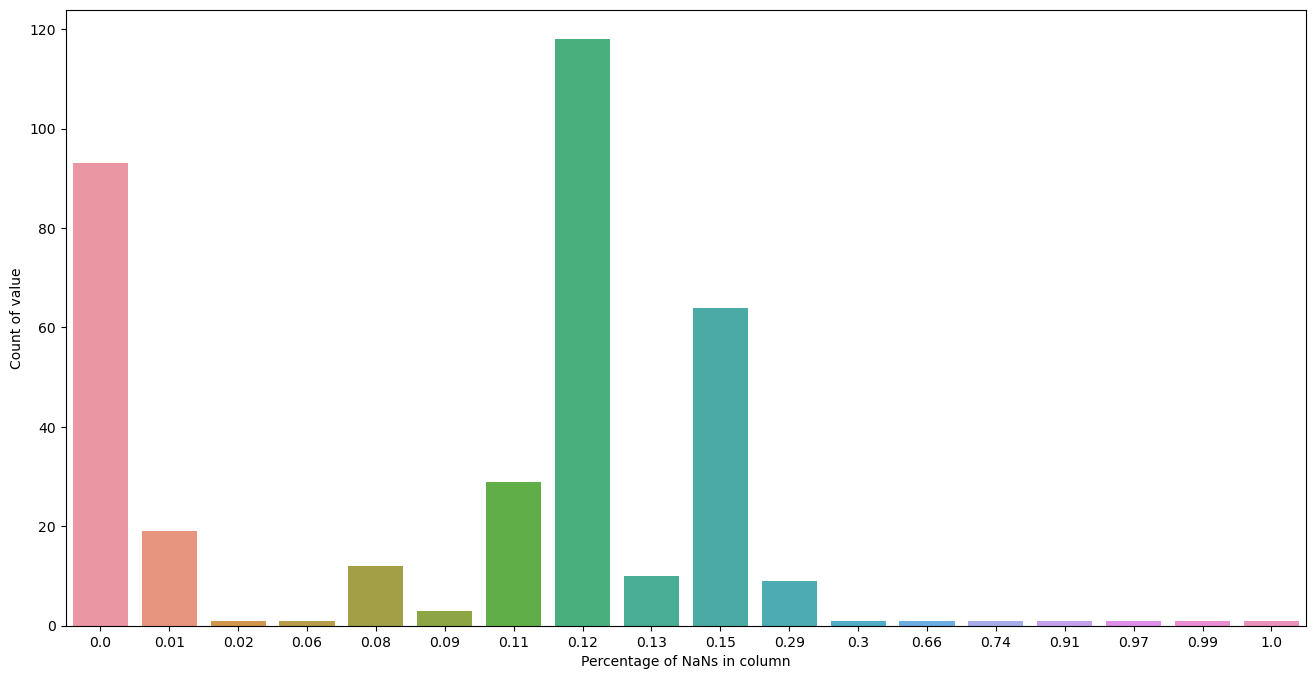

In [324]:
plt.figure(figsize=(16,8))
fig=sns.barplot(x=na_series.index, y=na_series.values )
fig.set(xlabel='Percentage of NaNs in column')
fig.set(ylabel='Count of value')

In [325]:
list_semio = df_azdias.columns[df_azdias.columns.str.contains('SEMIO_')].values
list_kba05_c_z = df_azdias.columns[df_azdias.columns.str.contains('KBA05_[C-Z]')].values
list_kba05_a_b = np.setdiff1d(df_azdias.columns[df_azdias.columns.str.contains('KBA05_[A-B]')].values, ['KBA05_AUTOQUOT'])
list_finanz = df_azdias.columns[df_azdias.columns.str.contains('FINANZ')].values
list_plz = df_azdias.columns[df_azdias.columns.str.contains('PLZ')].values
list_kba13 = np.setdiff1d(df_azdias.columns[df_azdias.columns.str.contains('KBA05_[A-B]')].values, ['KBA13_ANZAHL_PKW'])

In [326]:
unknown_9 = ['ZABEOTYP', 'RELAT_AB', 'KBA05_AUTOQUOT', 'KBA05_BAUMAX'] #'SEMIO_*', 'KBA05_C-Z'
unknown_9 = np.append(np.append(unknown_9,list_semio), list_kba05_c_z)
unknown_9

array(['ZABEOTYP', 'RELAT_AB', 'KBA05_AUTOQUOT', 'KBA05_BAUMAX',
       'SEMIO_DOM', 'SEMIO_ERL', 'SEMIO_FAM', 'SEMIO_KAEM', 'SEMIO_KRIT',
       'SEMIO_KULT', 'SEMIO_LUST', 'SEMIO_MAT', 'SEMIO_PFLICHT',
       'SEMIO_RAT', 'SEMIO_REL', 'SEMIO_SOZ', 'SEMIO_TRADV', 'SEMIO_VERT',
       'KBA05_CCM1', 'KBA05_CCM2', 'KBA05_CCM3', 'KBA05_CCM4',
       'KBA05_DIESEL', 'KBA05_FRAU', 'KBA05_GBZ', 'KBA05_HERST1',
       'KBA05_HERST2', 'KBA05_HERST3', 'KBA05_HERST4', 'KBA05_HERST5',
       'KBA05_HERSTTEMP', 'KBA05_KRSAQUOT', 'KBA05_KRSHERST1',
       'KBA05_KRSHERST2', 'KBA05_KRSHERST3', 'KBA05_KRSKLEIN',
       'KBA05_KRSOBER', 'KBA05_KRSVAN', 'KBA05_KRSZUL', 'KBA05_KW1',
       'KBA05_KW2', 'KBA05_KW3', 'KBA05_MAXAH', 'KBA05_MAXBJ',
       'KBA05_MAXHERST', 'KBA05_MAXSEG', 'KBA05_MAXVORB', 'KBA05_MOD1',
       'KBA05_MOD2', 'KBA05_MOD3', 'KBA05_MOD4', 'KBA05_MOD8',
       'KBA05_MODTEMP', 'KBA05_MOTOR', 'KBA05_MOTRAD', 'KBA05_SEG1',
       'KBA05_SEG10', 'KBA05_SEG2', 'KBA05_SEG3', 'KBA05_SE

In [327]:
unknown_1 = ['W_KEIT_KIND_HH', 'WACHSTUMSGEBIET_NB', 'WOHNLAGE', 'WOHNDAUER_2008', 'VERS_TYP', 'TITEL_KZ', 'SOHO_FLAG', 'SHOPPER_TYP', 'RELAT_AB', 'REGIOTYP', 'PRAEGENDE_JUGENDJAHRE', 'PRAEGENDE_JUGENDJAHRE',
             'OST_WEST_KZ', 'ORTSGR_KLS9', 'NATIONALITAET_KZ', 'KKK',
             'INNENSTADT', 'HH_EINKOMMEN_SCORE', 'HEALTH_TYP', 'HAUSHALTSSTRUKTUR', 'GEOSCORE_KLS7',
             'CAMEO_DEUINTL_2015', 'CAMEO_DEUG_2015', 'BIP_FLAG', 'BALLRAUM', 'ALTERSKATEGORIE_GROB', 'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3',
             'KBA05_ANTG4', 'KBA05_AUTOQUOT']

unknown_1 = np.append(np.append(np.append(unknown_1, list_finanz), list_plz), list_kba13)


In [328]:
unknown_1

array(['W_KEIT_KIND_HH', 'WACHSTUMSGEBIET_NB', 'WOHNLAGE',
       'WOHNDAUER_2008', 'VERS_TYP', 'TITEL_KZ', 'SOHO_FLAG',
       'SHOPPER_TYP', 'RELAT_AB', 'REGIOTYP', 'PRAEGENDE_JUGENDJAHRE',
       'PRAEGENDE_JUGENDJAHRE', 'OST_WEST_KZ', 'ORTSGR_KLS9',
       'NATIONALITAET_KZ', 'KKK', 'INNENSTADT', 'HH_EINKOMMEN_SCORE',
       'HEALTH_TYP', 'HAUSHALTSSTRUKTUR', 'GEOSCORE_KLS7',
       'CAMEO_DEUINTL_2015', 'CAMEO_DEUG_2015', 'BIP_FLAG', 'BALLRAUM',
       'ALTERSKATEGORIE_GROB', 'KBA05_ANTG1', 'KBA05_ANTG2',
       'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_AUTOQUOT', 'FINANZ_ANLEGER',
       'FINANZ_HAUSBAUER', 'FINANZ_MINIMALIST', 'FINANZ_SPARER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_VORSORGER', 'FINANZTYP',
       'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4',
       'PLZ8_BAUMAX', 'PLZ8_GBZ', 'PLZ8_HHZ', 'KBA05_ALTER1',
       'KBA05_ALTER2', 'KBA05_ALTER3', 'KBA05_ALTER4', 'KBA05_ANHANG',
       'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4',
       'KBA05_AUTO

In [329]:
unknown_0 = ['W_KEIT_KIND_HH', 'WACHSTUMSGEBIET_NB', 'WOHNDAUER_2008', 'TITEL_KZ', 'RETOURTYP_BK_S', 'REGIOTYP',
              'PRAEGENDE_JUGENDJAHRE', 'NATIONALITAET_KZ', 'HH_EINKOMMEN_SCORE', 'GEOSCORE_KLS7', 'CIT_GESAMTTYP', 'ALTER_HH', 'ALTERSKATEGORIE_GROB']

In [330]:
numerical = ['ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL', 'GEBURTSJAHR', 'MIN_GEBAEUDEJAHR', 'KBA13_ANZAHL_PKW', 'MIN_GEBAEUDEJAHR']

In [331]:
delete = ['KBA05_HERST5','KBA05_MODTEMP','KONSUMNAEHE',  'LP_FAMILIE_GROB', 'LP_LEBENSPHASE_FEIN', 'LP_STATUS_GROB', 'HAUSHALTSSTRUKTUR',
  'D19_GESAMT_OFFLINE_DATUM', 'CAMEO_DEU_2015', 'AGER_TYP', 'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'KBA05_SEG9', 'KBA05_VORB2', 'KBA05_VORB1'
  , 'KBA05_VORB0', 'row_nan_percentage', 'TITEL_KZ_2.0', 'GEBAEUDETYP_5.0']

In [332]:
categorical = ['D19_KONSUMTYP', 'FINANZTYP', 'GEBAEUDETYP', 'GFK_URLAUBERTYP', 'KBA05_GBZ' , 'LP_FAMILIE_FEIN', 'LP_STATUS_FEIN', 'TITEL_KZ', 'CJT_GESAMTTYP', 'SHOPPER_TYP', 'RETOURTYP_BK_S']

In [333]:
def transform_PRAEGENDE_JUGENDJAHRE(x):
  '''
    Transform PRAEGENDE_JUGENDJAHRE.

  Args:
  - x: Cell value

  Returns:
  - Transformed x
  '''
  if(x in [1, 2]):
    return 40
  elif(x in [3, 4]):
    return 50
  elif(x in [5, 6, 7]):
    return 60
  elif(x in [8, 9]):
    return 70
  elif(x in [10, 11, 12, 13]):
    return 80
  elif(x in [14, 15]):
    return 90

In [334]:
def transform_CAMEO_INTL_2015(x):
  '''
  Transform value for feature CAMEO_INTL_2015.

  Args:
  - x: Cell value

  Returns:
  - Transformed x
  '''
  if(str(x)[0] == '1'):
    return '1'
  if(str(x)[0] == '2'):
    return '2'
  if(str(x)[0] == '3'):
    return '3'
  if(str(x)[0] == '4'):
    return '4'
  if(str(x)[0] == '5'):
    return '5'
  else:
    return np.nan

In [335]:
def transform_CAMEO_DEUG_2015(x):
  '''
  Transform value for feature CAMEO_DEUG_2015.

  Args:
  - x: Cell value

  Returns:
  - Transformed x
  '''
  if(x == 'X'):
    return np.nan
  else:
    return x

In [336]:
def drop_rows_and_columns(df, column_threshold=0.3, row_threshold=0.3):
    '''
    Deletes rows and columns if certain threshold is met.
    Args:
    - df: Dataframe 
    - column_threshold: All columns with a nan percentage more then threshold will be dropped
    - row_threshold: All rows with a nan percentage more then threshold will be dropped

    Returns:
    - df_transformed: Transformed dataframe
    '''

# Drop ID column
    df = df.drop(columns="LNR")
    print("index droped")

    # Drop columns with nan percentage over certain threshold
    drop_columns = desc_df.loc[desc_df["na_percentage"]
                               > column_threshold]["column_name"].tolist()
    df = df.drop(columns=drop_columns)
    print(f"columns with nan threshold of {column_threshold} droped: ")
    print(drop_columns)

    # Drop rows with nan percentage over certain threshold
    df["row_nan_percentage"] = pd.Series(df.index).apply(
        lambda x: df.iloc[x, :].isna().sum()/df.shape[1])
    df = df.loc[df["row_nan_percentage"] < row_threshold]
    print(f"rows with nan threshold of {row_threshold} droped")

    return df


In [337]:
df_transformed = drop_rows_and_columns(df_azdias, column_threshold = 0.2, row_threshold = 0.1)

index droped
columns with nan threshold of 0.2 droped: 
['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'ALTERSKATEGORIE_FEIN', 'D19_BANKEN_ONLINE_QUOTE_12', 'D19_GESAMT_ONLINE_QUOTE_12', 'D19_KONSUMTYP', 'D19_LETZTER_KAUF_BRANCHE', 'D19_LOTTO', 'D19_SOZIALES', 'D19_TELKO_ONLINE_QUOTE_12', 'D19_VERSAND_ONLINE_QUOTE_12', 'D19_VERSI_ONLINE_QUOTE_12', 'EXTSEL992', 'KK_KUNDENTYP']
rows with nan threshold of 0.1 droped


In [338]:
def find_col_with_value(df, value):
    """
    Finds columns for given values
    Input:
    - df: Dataframe which to search for value.
    - value: Search value.
    Output:
    - Columns: Columns in which the value were found
    """
    columns = []
    for col in df:
        if (df[col] == value).any():
             columns.append(col)
    
    return columns

In [339]:
find_col_with_value(df_customers, 'COSMETIC_AND_FOOD')

['PRODUCT_GROUP']

In [340]:
list(set(delete).intersection(set(df_transformed.columns)))

['LP_LEBENSPHASE_FEIN',
 'D19_GESAMT_OFFLINE_DATUM',
 'KBA05_VORB0',
 'KBA05_VORB1',
 'KBA05_HERST5',
 'KBA05_MODTEMP',
 'CAMEO_DEU_2015',
 'LP_STATUS_GROB',
 'KONSUMNAEHE',
 'KBA05_VORB2',
 'EINGEFUEGT_AM',
 'KBA05_SEG9',
 'AGER_TYP',
 'LP_FAMILIE_GROB',
 'row_nan_percentage']

In [341]:
def transform_df(df):
  '''
  Transforms df that it can be used as data for ML methods.

  Args:
  - df: Dataframe 
  - column_threshold: All columns with a nan percentage more then threshold will be dropped
  - row_threshold: All rows with a nan percentage more then threshold will be dropped

  Returns:
  - df_transformed: Transformed dataframe

  '''
  print(f"shape before: {df.shape}")

  # Drop ID column
  if 'LNR' in df.columns.values:
    df = df.drop(columns="LNR")
    print("index droped")

  ### Drop columns with unknown data types and no description ###
  df_transformed = df.drop(columns=list(set(delete).intersection(set(df.columns))))
  print("columns with unknown datatype droped")

  # Transform "CAMEO_INTL_2015"
  df_transformed["CAMEO_INTL_2015"] = df_transformed["CAMEO_INTL_2015"].apply(transform_CAMEO_INTL_2015)
  print("CAMEO_INTL_2015 transformed")

  # Transform "CAMEO_DEUG_2015"
  df_transformed["CAMEO_DEUG_2015"] = df_transformed["CAMEO_DEUG_2015"].apply(transform_CAMEO_DEUG_2015)
  print("CAMEO_DEUG_2015 transformed")

  ### Transformation of binary columns ###

  df_transformed["ANREDE_KZ"] = df_transformed["ANREDE_KZ"].replace(2, 0)
  df_transformed["GREEN_AVANTGARDE"] = df_transformed["GREEN_AVANTGARDE"].fillna(df_transformed["GREEN_AVANTGARDE"].mode().values[0])
  df_transformed["OST_WEST_KZ"] = df_transformed["OST_WEST_KZ"].apply(lambda x: 1 if x == 'W' else (0 if 'O' else x))
  df_transformed["SOHO_KZ"] = df_transformed["SOHO_KZ"].fillna(df_transformed["SOHO_KZ"].mode().values[0])
  df_transformed["ANREDE_KZ"] = df_transformed["ANREDE_KZ"].fillna(df_transformed["ANREDE_KZ"].mode().values[0])
  df_transformed["OST_WEST_KZ"] = df_transformed["OST_WEST_KZ"].fillna(df_transformed["OST_WEST_KZ"].mode().values[0])
  print("binary columns transformed")

  ### Transformation of numerical columns ###

  numerical_columns = df_transformed.columns[df_transformed.columns.isin(numerical)]
  for col in list(set(numerical_columns).intersection(set(df_transformed.columns))):
    df_transformed[col] = df_transformed[col].fillna(df_transformed[col].median())
  print("numeric columns transformed")

  ### Transformation of ordinal columns ###

  # Transform ordinal columns that have no value for unknown
  ordinal_no_unknown_cols = df_transformed.columns[(~df_transformed.columns.isin(unknown_1)) & (~df_transformed.columns.isin(unknown_0)) 
                                                   & (~df_transformed.columns.isin(unknown_9)) & (~df_transformed.columns.isin(categorical))]
  print('ordinal_no_unknown_cols', ordinal_no_unknown_cols)
  for col in ordinal_no_unknown_cols:
    df_transformed[col] = df_transformed[col].fillna(df_transformed[col].median())
  print("ordinal columns that have no value for unkown transformed")

  # Transform ordinal colums that have 9 or -1 values for unknown
  ordinal_9_1_cols = df_transformed.columns[(df_transformed.columns.isin(unknown_9)) | (df_transformed.columns.isin(unknown_1))
                                             & (~df_transformed.columns.isin(unknown_0)) & (~df_transformed.columns.isin(categorical))]
  for col in ordinal_9_1_cols:
    df_transformed[col] = df_transformed[col].replace({9: np.nan, -1: np.nan}).fillna(df_transformed[col].median())
  print('ordinal_9_1_cols', ordinal_9_1_cols)
  print("ordinal colums that have 9 or -1 values for unknow transformed")

  # Transform ordinal columns that have 0 or -1 values for unknown
  ordinal_0_1_cols = df_transformed.columns[(df_transformed.columns.isin(unknown_0)) | (df_transformed.columns.isin(unknown_1))
                                             & (df_transformed.columns.isin(unknown_9)) &(~df_transformed.columns.isin(categorical))]
  for col in ordinal_0_1_cols:
    df_transformed[col] = df_transformed[col].replace(0, np.nan).fillna(df_transformed[col].median())
  print('ordinal_0_1_cols', ordinal_0_1_cols)
  print("ordinal colums that have 0 or -1 values for unknow transformed")

  ### Transformation of categorical features ###

  # Transform categorical columns that have 0 values for unknown
  categorical_0_columns = df_transformed.columns[(df_transformed.columns.isin(categorical)) & (df_transformed.columns.isin(unknown_0))
                                                  & (~df_transformed.columns.isin(unknown_1)) & (~df_transformed.columns.isin(unknown_9))]
  for col in categorical_0_columns:
    df_transformed[col] = df_transformed[col].replace({-1: np.nan, 0: np.nan})
  print('categorical_0_columns', categorical_0_columns)
  print("categorical columns that have 0 values for unknown transformed")

  # Transform "PRAEGENDE_JUGENDJAHRE"
  df_transformed["PRAEGENDE_JUGENDJAHRE"] = df_transformed["PRAEGENDE_JUGENDJAHRE"].apply(transform_PRAEGENDE_JUGENDJAHRE)
  print('"PRAEGENDE_JUGENDJAHRE" transformed')

  # Transform "ZABEOTYP"
  df_transformed["ZABEOTYP"] = df_transformed["ZABEOTYP"].replace({9: np.nan})
  print('"ZABEOTYP" transformed')

  # Transform "D19_KONSUMTYP", "FINANZTYP", "GEBAEUDETYP", "GFK_URLAUBERTYP", "SHOPPER_TYP"
  cat_temp = ["D19_KONSUMTYP", "FINANZTYP", "GEBAEUDETYP", "GFK_URLAUBERTYP", "SHOPPER_TYP"]
  cat_temp = list(set(cat_temp).intersection(set(df_transformed.columns)))
  for col in cat_temp:
    df_transformed[col] = df_transformed[col].replace({-1: np.nan})
  print('"D19_KONSUMTYP", "FINANZTYP", "GEBAEUDETYP", "GFK_URLAUBERTYP", "SHOPPER_TYP" transformed')

  # Create dummies
  cat_cols = categorical
  print(cat_cols)
  dummy_cols = list(set(cat_cols).intersection(set(df_transformed.columns)))
  print(dummy_cols)
  for col in dummy_cols:
    col_dum_df = pd.get_dummies(df_transformed[col], prefix=col, dummy_na=True)
    df_transformed = pd.concat([df_transformed, col_dum_df], axis=1)

  df_transformed = df_transformed.drop(columns=dummy_cols)
  print("Dummies created")

  # Transform everything to float
  df_transformed = df_transformed.astype(float)

  print(f"shape after: {df_transformed.shape}")
  return df_transformed

In [342]:
desc_df[["column_name", "na_percentage"]].sort_values(by='na_percentage', ascending=False)[:20]

,column_name,na_percentage
7,ALTER_KIND4,0.9987
6,ALTER_KIND3,0.9931
5,ALTER_KIND2,0.9665
4,ALTER_KIND1,0.9085
100,EXTSEL992,0.7365
300,KK_KUNDENTYP,0.6565
8,ALTERSKATEGORIE_FEIN,0.2972
85,D19_VERSAND_ONLINE_QUOTE_12,0.2902
62,D19_LOTTO,0.2902
36,D19_BANKEN_ONLINE_QUOTE_12,0.2902


In [343]:
df_azdias_transformed = transform_df(df_transformed)

shape before: (162081, 350)
columns with unknown datatype droped
CAMEO_INTL_2015 transformed
CAMEO_DEUG_2015 transformed
binary columns transformed
numeric columns transformed
ordinal_no_unknown_cols Index(['AKT_DAT_KL', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_KINDER',
       'ANZ_PERSONEN', 'ANZ_STATISTISCHE_HAUSHALTE', 'ANZ_TITEL', 'ARBEIT',
       'CAMEO_INTL_2015', 'CJT_KATALOGNUTZER',
       ...
       'UMFELD_ALT', 'UMFELD_JUNG', 'UNGLEICHENN_FLAG', 'VERDICHTUNGSRAUM',
       'VHA', 'VHN', 'VK_DHT4A', 'VK_DISTANZ', 'VK_ZG11', 'ANREDE_KZ'],
      dtype='object', length=221)
ordinal columns that have no value for unkown transformed
ordinal_9_1_cols Index(['BALLRAUM', 'CAMEO_DEUG_2015', 'FINANZ_ANLEGER', 'FINANZ_HAUSBAUER',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_UNAUFFAELLIGER',
       'FINANZ_VORSORGER', 'HEALTH_TYP', 'INNENSTADT', 'KBA05_ALTER1',
       'KBA05_ALTER2', 'KBA05_ALTER3', 'KBA05_ALTER4', 'KBA05_ANHANG',
       'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANT

In [344]:
df_customers_transformed = drop_rows_and_columns(df_customers, column_threshold = 0.2, row_threshold = 0.1)

index droped
columns with nan threshold of 0.2 droped: 
['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'ALTERSKATEGORIE_FEIN', 'D19_BANKEN_ONLINE_QUOTE_12', 'D19_GESAMT_ONLINE_QUOTE_12', 'D19_KONSUMTYP', 'D19_LETZTER_KAUF_BRANCHE', 'D19_LOTTO', 'D19_SOZIALES', 'D19_TELKO_ONLINE_QUOTE_12', 'D19_VERSAND_ONLINE_QUOTE_12', 'D19_VERSI_ONLINE_QUOTE_12', 'EXTSEL992', 'KK_KUNDENTYP']
rows with nan threshold of 0.1 droped


In [345]:
df_customers_transformed = df_customers_transformed.drop(['CUSTOMER_GROUP', 'ONLINE_PURCHASE','PRODUCT_GROUP'], axis=1)

In [346]:
df_customers_transformed = transform_df(df_customers_transformed)

shape before: (135144, 350)
columns with unknown datatype droped
CAMEO_INTL_2015 transformed
CAMEO_DEUG_2015 transformed
binary columns transformed
numeric columns transformed
ordinal_no_unknown_cols Index(['AKT_DAT_KL', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_KINDER',
       'ANZ_PERSONEN', 'ANZ_STATISTISCHE_HAUSHALTE', 'ANZ_TITEL', 'ARBEIT',
       'CAMEO_INTL_2015', 'CJT_KATALOGNUTZER',
       ...
       'UMFELD_ALT', 'UMFELD_JUNG', 'UNGLEICHENN_FLAG', 'VERDICHTUNGSRAUM',
       'VHA', 'VHN', 'VK_DHT4A', 'VK_DISTANZ', 'VK_ZG11', 'ANREDE_KZ'],
      dtype='object', length=221)
ordinal columns that have no value for unkown transformed
ordinal_9_1_cols Index(['BALLRAUM', 'CAMEO_DEUG_2015', 'FINANZ_ANLEGER', 'FINANZ_HAUSBAUER',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_UNAUFFAELLIGER',
       'FINANZ_VORSORGER', 'HEALTH_TYP', 'INNENSTADT', 'KBA05_ALTER1',
       'KBA05_ALTER2', 'KBA05_ALTER3', 'KBA05_ALTER4', 'KBA05_ANHANG',
       'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANT

### Drop difference

In [347]:
diff_columns_azdias = list(set(df_azdias_transformed.columns) - set(df_customers_transformed.columns))
diff_columns_azdias

['TITEL_KZ_2.0']

In [348]:
diff_columns_customers = list(set(df_customers_transformed.columns) - set(df_azdias_transformed.columns))
diff_columns_customers

['KBA05_GBZ_0.0']

In [349]:
df_azdias_transformed = df_azdias_transformed.drop(diff_columns_azdias, axis=1)
df_customers_transformed = df_customers_transformed.drop(diff_columns_customers, axis=1)

print(df_azdias_transformed.shape)
print(df_customers_transformed.shape)

(162081, 406)
(135144, 406)


### Scale demographic data

In [350]:
# Create and fit scaler
cols = df_azdias_transformed.columns.tolist()
scaler = StandardScaler()
scaler.fit(df_azdias_transformed.values)
# Save scaler for later usage
dump(scaler, open('scaler.pkl', 'wb'))

In [351]:
scaled_features = scaler.transform(df_azdias_transformed.values)
# Create df
scaled_df = pd.DataFrame(scaled_features, columns=cols)

In [352]:
scaled_df

,AKT_DAT_KL,ALTER_HH,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_ONLINE_DATUM,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP_MAX,D19_KOSMETIK,D19_LEBENSMITTEL,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEZOGENAM_HH_JAHR,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FIRMENDICHTE,GEBAEUDETYP_RASTER,GEBURTSJAHR,GEMEINDETYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG1,KBA13_ANTG2,KBA13_ANTG3,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BAUMAX,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_GBZ,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_HHZ,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA13_SEG_GELAENDEWAGEN,KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_KLEINST,KBA13_SEG_KLEINWAGEN,KBA13_SEG_KOMPAKTKLASSE,KBA13_SEG_MINIVANS,KBA13_SEG_MINIWAGEN,KBA13_SEG_MITTELKLASSE,KBA13_SEG_OBEREMITTELKLASSE,KBA13_SEG_OBERKLASSE,KBA13_SEG_SONSTIGE,KBA13_SEG_SPORTWAGEN,KBA13_SEG_UTILITIES,KBA13_SEG_VAN,KBA13_SEG_WOHNMOBILE,KBA13_SITZE_4,KBA13_SITZE_5,KBA13_SITZE_6,KBA13_TOYOTA,KBA

In [353]:
scaled_df.columns[scaled_df.isnull().any()].tolist()

[]

# Part 1: Customer Segmentation Report

### PCA Analysis
Fit data until 90% of datasets variance is reached.

In [374]:
explained_var = 0.9
pca = PCA(explained_var)
pca_components = pca.fit(scaled_df)

In [355]:
# Save pca
dump(pca, open('pca.pkl', 'wb'))

The eigenvector loadings represent the coefficients that depict the linear relationship between the original variables and the PCA components. The magnitude of an eigenvector loading indicates the degree of correlation between the respective variable and the PCA component.

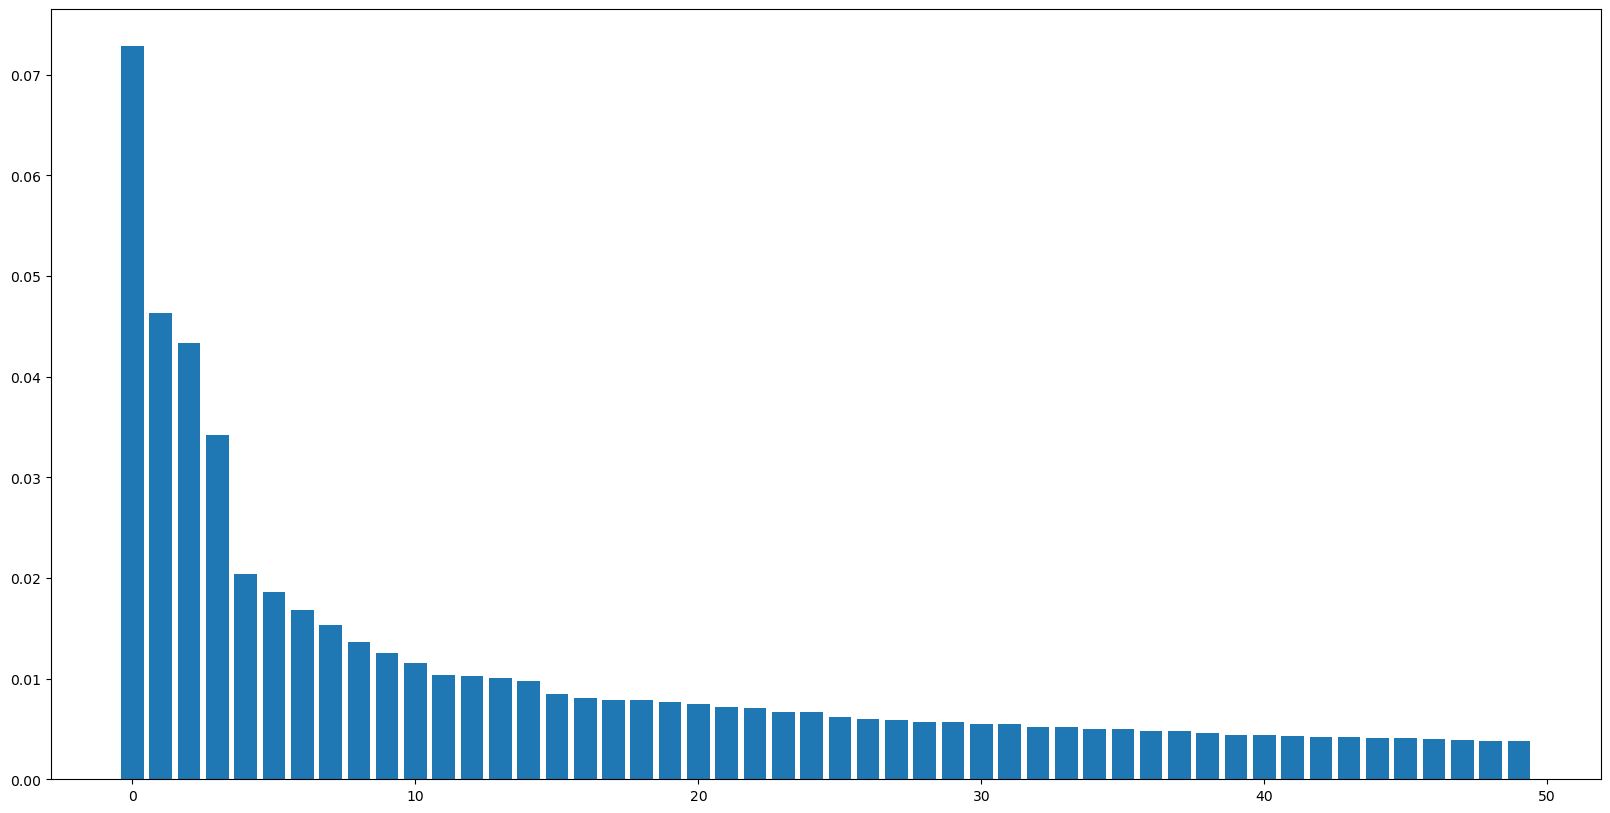

In [358]:
loadings = range(pca.n_components_)

fig, ax = plt.subplots(figsize=(20, 10))
fig = plt.bar(loadings[:50], pca.explained_variance_ratio_[:50])

In [380]:
principal_components = np.array([pca.components_[0],pca.components_[1], pca.components_[2], pca.components_[3]])


Show most important drivers of principal components.

In [388]:

for i in range(3):
    print(50*"=")
    print("Principal component " + str(i+1))
    
    pc_max_indices = np.argsort(principal_components[i])[-3:][::-1]
    pc_min_indices = np.argsort(principal_components[i])[:3][::-1]


    print(50*"_")

    print("High positive influence on principal component " + str(i+1) + " :")
    for n in pc_max_indices:
        print(f"- {scaled_df.columns[n]}")

    print(50*"-")

    print("High negative influence on principal component " + str(i+1) + " :")
    for n in pc_min_indices:
        print(f"- {scaled_df.columns[n]}")
    print(50*"=")


Principal component 1
__________________________________________________
High positive influence on principal component 1 :
- MOBI_REGIO
- PLZ8_ANTG1
- KBA13_ANTG1
--------------------------------------------------
High negative influence on principal component 1 :
- KBA13_ANTG4
- KBA13_ANTG3
- PLZ8_ANTG3
Principal component 2
__________________________________________________
High positive influence on principal component 2 :
- PRAEGENDE_JUGENDJAHRE
- CJT_TYP_1
- FINANZ_SPARER
--------------------------------------------------
High negative influence on principal component 2 :
- CJT_TYP_4
- CJT_TYP_5
- FINANZ_VORSORGER
Principal component 3
__________________________________________________
High positive influence on principal component 3 :
- KBA13_HERST_BMW_BENZ
- KBA13_SEG_OBEREMITTELKLASSE
- KBA13_MERCEDES
--------------------------------------------------
High negative influence on principal component 3 :
- KBA13_SEG_KLEINWAGEN
- KBA13_KMH_140_210
- KBA13_SITZE_5


### Cluster data using Kmeans and apply it to demographic and customer data

In [45]:
pca_components = pd.DataFrame(pca.transform(np.array(scaled_df)))

/Users/em07od/opt/anaconda3/envs/machineLearning/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [46]:
k_range = range(1, 20)
ch_scores = []
inertia_list = []
db_scores = []
labels = {}
for k in k_range:
  # Build model.
  model = KMeans(n_clusters=k)
  # Fit model.
  model.fit(pca_components)
  # Save cluster labels.
  cluster_labels = model.labels_
   # Compute the Calinski-Harabasz score and append.
  if k > 1:
    ch_score = calinski_harabasz_score(pca_components, cluster_labels)
    ch_scores.append(ch_score)
  # Append inertia
  labels[k] = cluster_labels
  inertia_list.append(model.inertia_)

Get difference between inertias to determine number of clusters.

In [47]:
diff_inertia = np.diff(inertia_list)
diff_inertia

array([-3424648.60563426, -1538513.91388585, -1004947.00752193,
        -846947.62732472,  -706691.88045753,  -637214.08383753,
        -477954.22162456,  -434775.90287359,   -86601.65730461,
        -628595.03897171,  -269107.71956183,  -224016.22123439,
        -193159.59045059,  -184065.65827186,  -182406.38640562,
        -201899.45850816,  -401972.51098965,   -78061.35800359])

### Elbow-method

How the Elbow Method works:

- Perform the k-means algorithm on your data for a range of possible cluster numbers (e.g., from 1 to k_max).
- For each value of the cluster number, calculate the sum of squared errors (SSE), which is the sum of the squared distances between each point and its corresponding cluster center.
- Plot the SSE values against the corresponding cluster numbers.
- Interpret the resulting plot. Typically, the SSE will decrease rapidly at first as the number of clusters increases. 
- There will be a point where adding another cluster only results in a marginal improvement in SSE. This point is referred to as the "elbow."
- The point at the "elbow" is considered an indicator of the optimal number of clusters.

In [48]:
def elbow_point(diff_inertia=diff_inertia):
    '''
    Functions find cluster elbow_point based on difference in cluster inertia.
    Input:
    - diff_inertia: Difference between inertia.
    Output:
    - elbow_point: Found elbow point
    - i: Index of elbow point  
    '''
    for i, diff in enumerate(diff_inertia):
        if i > 0:
            if diff_inertia[i-1] < diff > diff_inertia[i+1]:
                elbow_point = diff
                # plus two since we use here the differences and start with i=0.
                return elbow_point, i+2

Results means that 10 cluster are sufficient for demographic data.

In [49]:
found_elbow_point = elbow_point()[1]
print("The found elbow point suggest a cluster number of " + str(found_elbow_point))


The found elbow point suggest a cluster number of 10


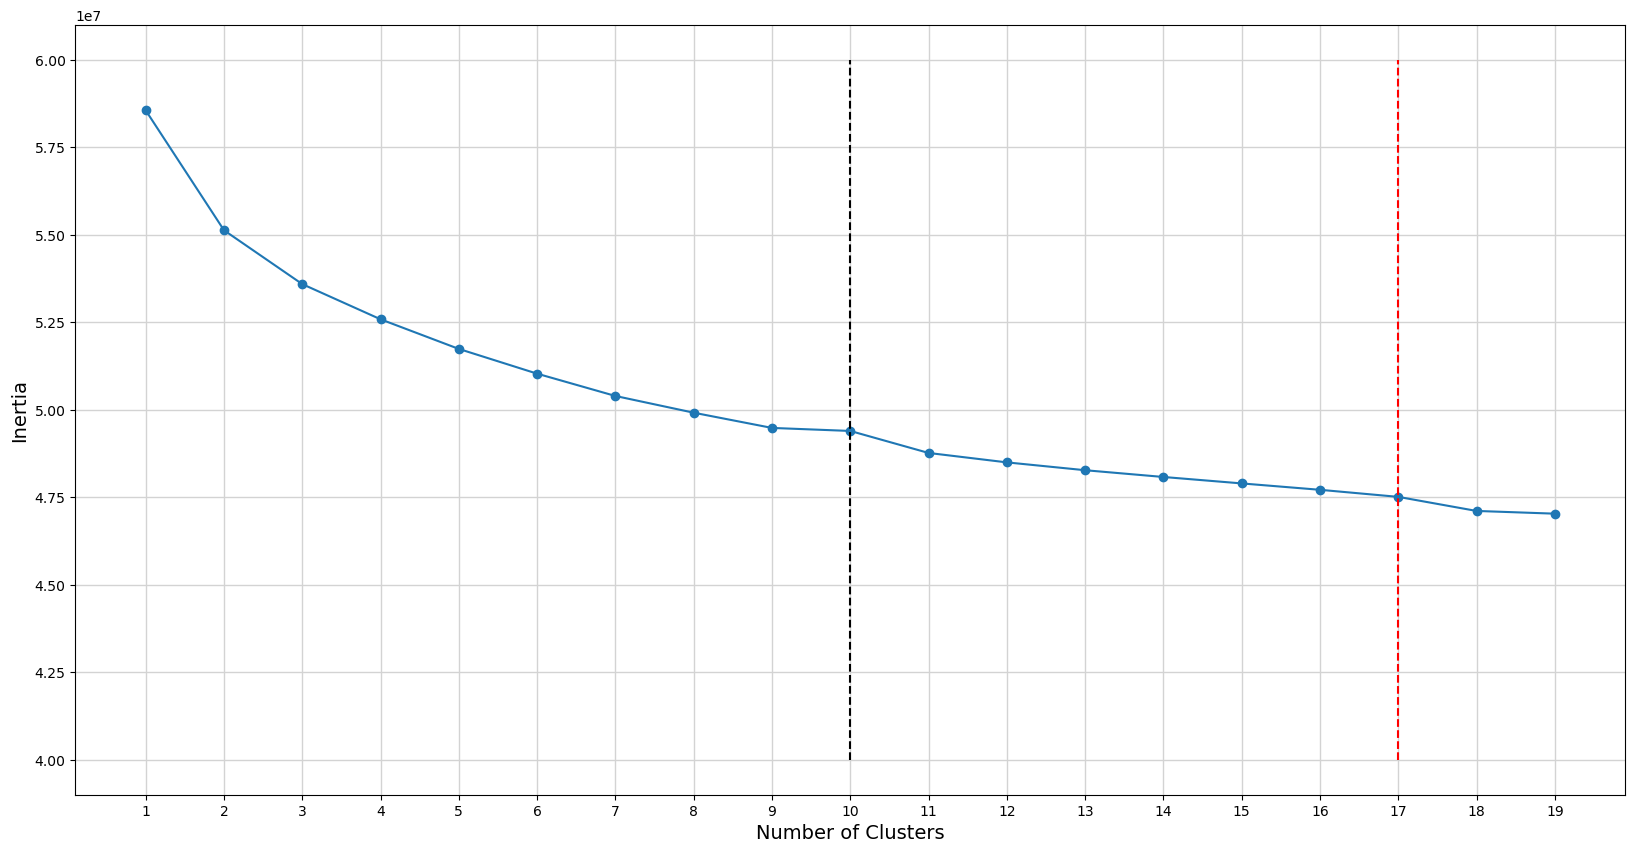

In [50]:
fig, ax = plt.subplots(figsize=(20, 10))
fig = plt.plot(k_range, inertia_list, '-o')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.xticks(k_range)
ax.vlines(found_elbow_point, 40000000, 60000000, color='black', linestyle='--')
ax.vlines(17, 40000000, 60000000, color='red', linestyle='--')
ax.grid(color='lightgrey', linestyle='-', linewidth=1)
ax.set_facecolor("white")

8 seems to be a good estimate for the optimal number of clusters. However 17 could also be a potential elbow point.

### CH Score

The Calinski-Harabasz Index calculates the ratio of between-cluster dispersion to within-cluster dispersion. It aims to maximize this ratio to determine the optimal number of clusters. Higher values of the index indicate better-defined clusters.

Remember that scores start for number of clusters = 2

In [51]:

print(ch_scores)

[10068.821537027869, 7505.530663661328, 6131.790882979323, 5337.4129988543045, 4777.93722072668, 4373.5069748870865, 4006.295740241024, 3714.3024192082407, 3338.94395435009, 3252.6812762917284, 3055.131045049542, 2876.192255717836, 2715.6829231141774, 2575.869956536796, 2454.627415995582, 2354.022455775853, 2315.788086863796, 2205.693881041656]


Since Elbow Methods heuristically suggests either 10 or 17 clusters and CH scores decreses for higher number of cluster I decided to take 10 as the number of cluster for the subsequent investigation.

### Analyse clusters

In [52]:
# Save kmeans
dump(model, open('kmeans.pkl', 'wb'))

In [54]:
demo_labels_df = pd.DataFrame(labels[10])

In [104]:
demo_labels_df = demo_labels_df.rename(columns={0:'Cluster'})
demo_labels_df.groupby('Cluster').value_counts()
demo_c_ana = pd.DataFrame(demo_labels_df.groupby('Cluster').value_counts())
demo_c_ana['Proportion'] = demo_c_ana.apply(lambda x:x/len(demo_labels_df), axis=0)
demo_c_ana = demo_c_ana.rename(columns = {0: 'Occurances'})
demo_c_ana = demo_c_ana.reset_index()


Cluster customer data in 10 clusters.

In [77]:
# Scale features
cols = df_customers_transformed.columns.tolist()
scaled_features = scaler.transform(df_customers_transformed.values)

# Create df
scaled_df = pd.DataFrame(scaled_features, columns=cols)
scaled_df.head(3)

# Transform customer data
pca_components = pd.DataFrame(pca.transform(np.array(scaled_df)))

# Build model.
model = KMeans(n_clusters=10)
  # Fit model.
model.fit(pca_components)
  # Save cluster labels.
customer_cluster_labels = model.labels_

/Users/em07od/opt/anaconda3/envs/machineLearning/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [105]:
customer_labels_df = pd.DataFrame(customer_cluster_labels)
customer_labels_df = customer_labels_df.rename(columns={0:'Cluster'})
customer_c_ana = pd.DataFrame(customer_labels_df.groupby('Cluster').value_counts())
customer_c_ana['Proportion'] = customer_c_ana.apply(lambda x:x/len(customer_labels_df), axis=0)
customer_c_ana = customer_c_ana.rename(columns = {0: 'Occurances'})
customer_c_ana = customer_c_ana.reset_index()


In [114]:
df_customers_transformed['labels'] = customer_cluster_labels

Save data in csv format

In [116]:
demo_labels_df.to_csv('cluster_analysis/demographic_labels.csv')
demo_c_ana.to_csv('cluster_analysis/demographic_cluster_analysis.csv')
customer_labels_df.to_csv('cluster_analysis/customer_labels.csv')
customer_c_ana.to_csv('cluster_analysis/customer_cluster_analysis.csv')
df_customers_transformed.to_csv('cleaned_and_labeled_customers.csv')

Text(0.5, 1.0, 'Proportions of demographic clusters')

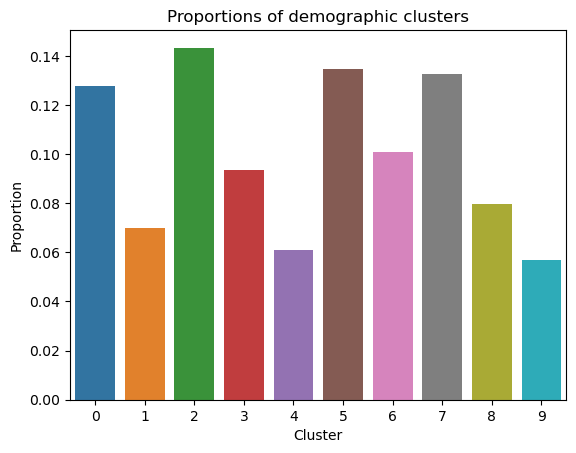

In [112]:
sns.barplot(data=demo_c_ana,x='Cluster', y="Proportion").set_title("Proportions of demographic clusters")

Text(0.5, 1.0, 'Proportions of customer clusters')

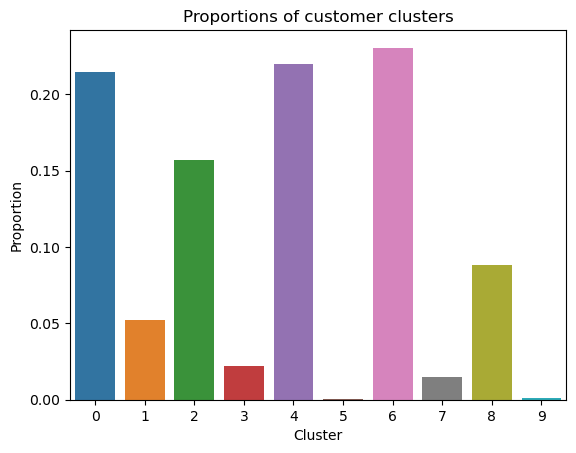

In [113]:
sns.barplot(data=customer_c_ana,x='Cluster', y="Proportion").set_title("Proportions of customer clusters")

It can be seen that in descending order cluster 6,4,0,2 and 8 are the most influencial customer clusters.

In [193]:
mean_customer_clusters_df = df_customers_transformed.groupby('labels').mean()
#mean_customer_clusters_df = mean_customer_clusters_df.reset_index()
mean_customer_clusters_df

,AKT_DAT_KL,ALTER_HH,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_ONLINE_DATUM,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP_MAX,D19_KOSMETIK,D19_LEBENSMITTEL,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEZOGENAM_HH_JAHR,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FIRMENDICHTE,GEBAEUDETYP_RASTER,GEBURTSJAHR,GEMEINDETYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG1,KBA13_ANTG2,KBA13_ANTG3,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BAUMAX,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_GBZ,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_HHZ,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA13_SEG_GELAENDEWAGEN,KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_KLEINST,KBA13_SEG_KLEINWAGEN,KBA13_SEG_KOMPAKTKLASSE,KBA13_SEG_MINIVANS,KBA13_SEG_MINIWAGEN,KBA13_SEG_MITTELKLASSE,KBA13_SEG_OBEREMITTELKLASSE,KBA13_SEG_OBERKLASSE,KBA13_SEG_SONSTIGE,KBA13_SEG_SPORTWAGEN,KBA13_SEG_UTILITIES,KBA13_SEG_VAN,KBA13_SEG_WOHNMOBILE,KBA13_SITZE_4,KBA13_SITZE_5,KBA13_SITZE_6,KBA13_TOYOTA,KBA

In [194]:
identified_clusters = [6,4,0,2,8]
high_variance_columns = ['MOBI_REGIO', 'OST_WEST_KZ', 'KBA13_ANTG1',
                        'PRAEGENDE_JUGENDJAHRE', 'CJT_TYP_1',
                        'FINANZ_VORSORGER', 'KBA13_HERST_BMW_BENZ',
                        'KBA13_SEG_MITTELKLASSE', 'KBA13_MAZDA']
mean_customer_clusters_df.loc[identified_clusters, high_variance_columns]

,MOBI_REGIO,OST_WEST_KZ,KBA13_ANTG1,PRAEGENDE_JUGENDJAHRE,CJT_TYP_1,FINANZ_VORSORGER,KBA13_HERST_BMW_BENZ,KBA13_SEG_MITTELKLASSE,KBA13_MAZDA
labels,,,,,,,,,
6,4.216376,0.951399,2.853137,56.188687,1.772381,4.733064,3.095371,2.949536,2.820757
4,4.103152,0.967841,2.580752,54.395078,1.636272,4.791134,4.049250,2.951289,2.939828
0,4.221379,0.927391,2.734987,66.233314,2.427271,4.263082,3.237074,2.941741,2.895657
2,2.228360,0.802863,1.602571,57.449845,2.115852,4.541443,3.057973,3.069182,3.333757
8,1.862717,0.915918,1.465050,59.567844,2.274146,4.447596,4.346899,3.117060,2.815809


In [197]:
mean_customer_clusters_df.PRAEGENDE_JUGENDJAHRE = mean_customer_clusters_df.PRAEGENDE_JUGENDJAHRE/10

<AxesSubplot:title={'center':'Difference between the identified clusters in high variance columns'}, xlabel='Cluster', ylabel='Mean value'>

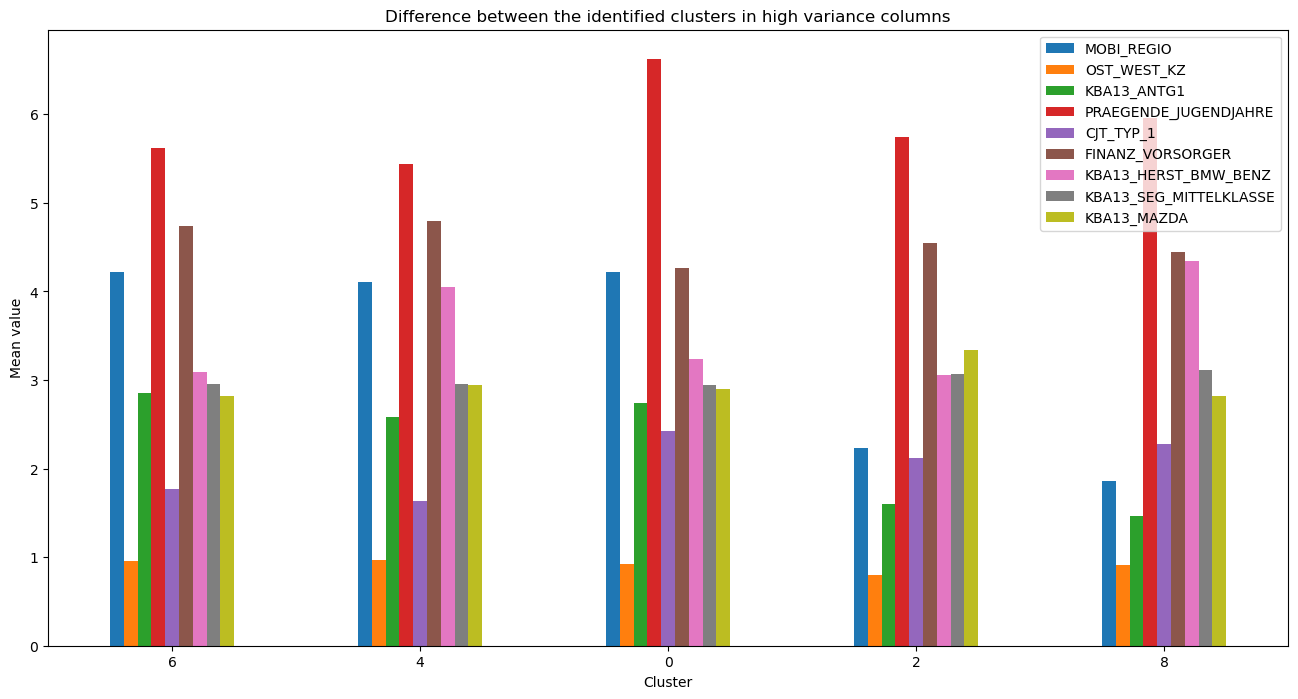

In [198]:
mean_customer_clusters_df.loc[identified_clusters, high_variance_columns].plot(kind='bar'
                        , rot=0, figsize=(16,8), title="Difference between the identified clusters in high variance columns"
                        , xlabel="Cluster", ylabel="Mean value")

Analysis of the columns which do contribute to variance throughout the dataset the most. Note that this is only a very small subset of the complete dataset. With more computational power and time one could use even more columns and all of the clusters.

# Part 2: Supervised Learning



In [299]:
df_train = pd.read_csv('cluster_analysis/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

/var/folders/d0/9fww0yld04lcs00vtk4y1lr80000gn/T/ipykernel_76937/1266203055.py:1: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('cluster_analysis/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')


Prepare data

In [300]:
Y = np.array(df_train["RESPONSE"])
df_train_X = df_train.drop(columns="RESPONSE")
df_train_X = transform_df(df_train_X)
X = np.array(df_train_X)

shape before: (42962, 366)
index droped
columns with unknown datatype droped
CAMEO_INTL_2015 transformed
CAMEO_DEUG_2015 transformed
binary columns transformed
numeric columns transformed
ordinal_no_unknown_cols Index(['AKT_DAT_KL', 'ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3',
       'ALTER_KIND4', 'ALTERSKATEGORIE_FEIN', 'ANZ_HAUSHALTE_AKTIV',
       'ANZ_HH_TITEL', 'ANZ_KINDER', 'ANZ_PERSONEN',
       ...
       'UMFELD_ALT', 'UMFELD_JUNG', 'UNGLEICHENN_FLAG', 'VERDICHTUNGSRAUM',
       'VHA', 'VHN', 'VK_DHT4A', 'VK_DISTANZ', 'VK_ZG11', 'ANREDE_KZ'],
      dtype='object', length=235)
ordinal columns that have no value for unkown transformed
ordinal_9_1_cols Index(['BALLRAUM', 'CAMEO_DEUG_2015', 'FINANZ_ANLEGER', 'FINANZ_HAUSBAUER',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_UNAUFFAELLIGER',
       'FINANZ_VORSORGER', 'HEALTH_TYP', 'INNENSTADT', 'KBA05_ALTER1',
       'KBA05_ALTER2', 'KBA05_ALTER3', 'KBA05_ALTER4', 'KBA05_ANHANG',
       'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_

In [309]:
models = [XGBRegressor(), RandomForestClassifier()]
for i in models:
    print(50*"=")
    print("Execute Algorithm: " + str(i) + "\n")
    model = i
    pipeline = Pipeline([('model', model)])
    # Evaluate pipeline
    cv = StratifiedKFold(n_splits=5)
    scores = cross_val_score(pipeline, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
    print("Mean AUROC: %.3f" % np.mean(scores))
print(50*"=")


Execute Algorithm: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)



Mean AUROC: 0.589
Execute Algorithm: RandomForestClassifier()

Mean AUROC: 0.588


In [203]:
xgb_model = XGBRegressor(objective = "binary:logistic")

In [240]:
pipeline = Pipeline([('scaler', StandardScaler())
                    ,('model', xgb_model)])

In [241]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              objective='binary:logistic', predictor=None, ...))])

In [251]:
df_train_X[df_train.RESPONSE == 0].shape[0]/df_train_X.shape[0]

0.9876169638284996

In [252]:
scale_pos_weight=df_train_X[df_train.RESPONSE == 0].shape[0]/df_train_X[df_train.RESPONSE == 1].shape[0]
scale_pos_weight

79.75563909774436

In [249]:
xgb_model = XGBRegressor(objective = "binary:logistic", scale_pos_weight=scale_pos_weight)

params = {
        'model__learning_rate': [0.1,0.2],
        'model__n_estimators': [50, 100],
        'model__max_depth': [3, 4, 5],
        'model__gamma': [0.5, 1, 1.5],
        'model__subsample': [0.6, 0.8],
        'model__min_child_weight': [1, 2],
        }
# use here randomizedsearchcv to find best parameters.
grid_search = RandomizedSearchCV(pipeline, params, n_iter=20,
                                      cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                      scoring='roc_auc', verbose=1, n_jobs=-1,
                                      random_state=42)
grid_search.fit(X, Y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_

/Users/em07od/opt/anaconda3/envs/machineLearning/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'model__subsample': 0.8, 'model__n_estimators': 50, 'model__min_child_weight': 1, 'model__max_depth': 3, 'model__learning_rate': 0.1, 'model__gamma': 1.5}
Best score: 0.7534930124208438
